In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

In [ ]:
for file in ["a","b","c"]:
    filename = "7"+file+"_hsuccess.txt"
    dat_success = pd.read_csv(filename, names=['S/FS'])
    dat_success['outcome'] = "s"
    filename = "7"+file+"_hfail.txt"
    dat_fail = pd.read_csv(filename, names=['S/FS'])
    dat_fail['outcome'] = "f"

    dat = pd.concat([dat_success, dat_fail], ignore_index=True)

    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(8, 6))

    sns.histplot(dat, y="S/FS", hue="outcome", multiple="stack", palette="coolwarm", edgecolor="0.3", linewidth=0.5, bins=25, stat='percent')
    
    outfile = "7"+file+"_I.eps"
    plt.savefig(outfile, format='eps', dpi=600)
    plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


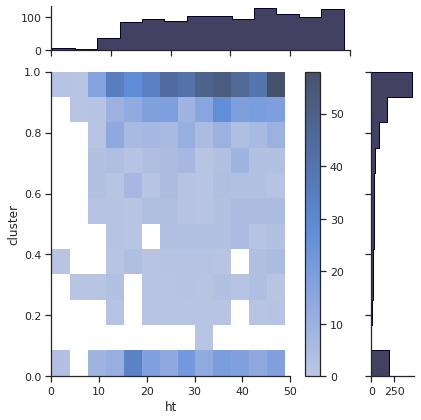

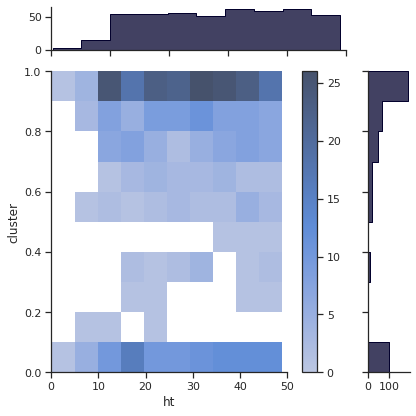

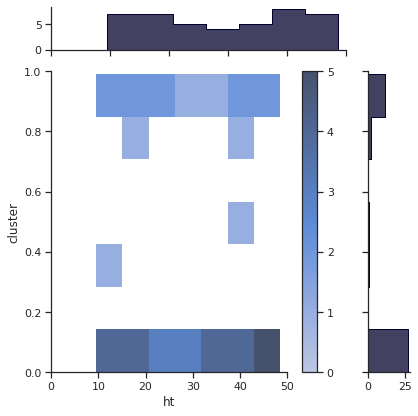

In [4]:
L = 2.5
beta_e = 15.0
for file in ["a", "b", "c"]:
    filename = "7"+file+"_ht_distro.txt"
    df = pd.read_csv(filename, names=['cluster', 'ht'], delimiter='\t')
    df['ht'] = df['ht']/math.sqrt(L/beta_e)

    sns.set_theme(style="ticks")

    g = sns.JointGrid(data=df, y="cluster", x="ht", marginal_ticks=True, xlim=(0, 50.0), ylim=(0, 1), space=0.5)
    g.plot_joint(sns.histplot, cbar=True)
    g.plot_marginals(sns.histplot, element="step", color="#03012d")
    
    outfile = "7"+file+"_II.eps"
    g.savefig(outfile, dpi=600)